In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix, ConfusionMatrixDisplay



In [2]:
df = pd.read_csv('shared/complaints_25Nov21.csv')

In [3]:
df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2016-10-26,Money transfers,International money transfer,Other transaction issues,NaN,"To whom it concerns, I would like to file a fo...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NaN,NaN,NaN,Consent provided,Web,2016-10-29,Closed with explanation,Yes,No,2180490
1,2015-03-27,Bank account or service,Other bank product/service,"Account opening, closing, or management",NaN,My name is XXXX XXXX XXXX and huband name is X...,Company chooses not to provide a public response,"CITIBANK, N.A.",PA,151XX,Older American,Consent provided,Web,2015-03-27,Closed with explanation,Yes,No,1305453
2,2015-04-20,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",NaN,XXXX 2015 : I called to make a payment on XXXX...,Company chooses not to provide a public response,U.S. BANCORP,PA,152XX,NaN,Consent provided,Web,2015-04-22,Closed with monetary relief,Yes,No,1337613
3,2013-04-29,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,NaN,NaN,JPMORGAN CHASE & CO.,VA,22406,Servicemember,NaN,Phone,2013-04-30,Closed with explanation,Yes,Yes,393900
4,2013-05-29,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",GA,30044,NaN,NaN,Referral,2013-05-31,Closed with explanation,Yes,No,418647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207255,2015-05-24,Debt collection,Credit card,Taking/threatening an illegal action,Sued w/o proper notification of suit,NaN,NaN,JPMORGAN CHASE & CO.,FL,33133,NaN,Consent not provided,Web,2015-05-24,Closed with explanation,Yes,No,1390395
207256,2012-01-10,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,JPMORGAN CHASE & CO.,NY,10312,NaN,NaN,Referral,2012-01-11,Closed without relief,Yes,Yes,12192
207257,2012-07-17,Student loan,Non-federal student loan,Repaying your loan,NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",NH,032XX,NaN,NaN,Web,2012-07-18,Closed with explanation,Yes,No,118351
207258,2016-09-29,Bank account or service,Checking account,"Account opening, closing, or management",NaN,Near the end of XXXX 2016 I opened a Citigold ...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",CA,900XX,NaN,Consent provided,Web,2016-09-29,Closed with non-monetary relief,Yes,No,2138969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207260 entries, 0 to 207259
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 207260 non-null  object
 1   Product                       207260 non-null  object
 2   Sub-product                   164245 non-null  object
 3   Issue                         207260 non-null  object
 4   Sub-issue                     10347 non-null   object
 5   Consumer complaint narrative  29391 non-null   object
 6   Company public response       58458 non-null   object
 7   Company                       207260 non-null  object
 8   State                         205066 non-null  object
 9   ZIP code                      197974 non-null  object
 10  Tags                          28265 non-null   object
 11  Consumer consent provided?    51313 non-null   object
 12  Submitted via                 207260 non-null  object
 13 

In [5]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)

<AxesSubplot:>

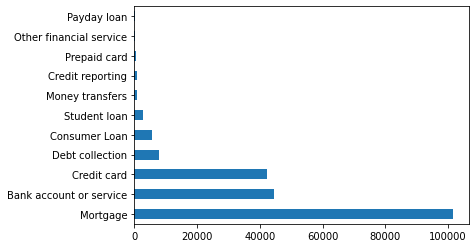

In [6]:
df['Product'].value_counts().plot(kind='barh')

In [7]:
df['Product'].value_counts(normalize=True)

Mortgage                   0.490592
Bank account or service    0.215160
Credit card                0.203566
Debt collection            0.037928
Consumer Loan              0.026575
Student loan               0.013828
Money transfers            0.004193
Credit reporting           0.003575
Prepaid card               0.003064
Other financial service    0.001119
Payday loan                0.000400
Name: Product, dtype: float64

<AxesSubplot:>

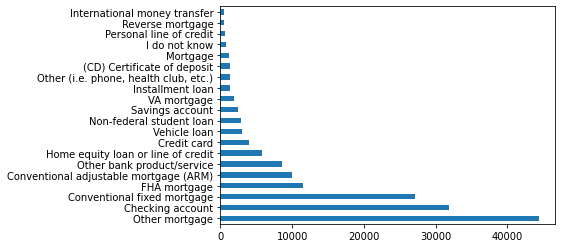

In [8]:
df['Sub-product'].value_counts()[:20].plot(kind='barh')

In [9]:
df['Sub-product'].value_counts(normalize=True)

Other mortgage                            0.270437
Checking account                          0.194100
Conventional fixed mortgage               0.165028
FHA mortgage                              0.070480
Conventional adjustable mortgage (ARM)    0.060641
Other bank product/service                0.051904
Home equity loan or line of credit        0.035630
Credit card                               0.024713
Vehicle loan                              0.018746
Non-federal student loan                  0.017821
Savings account                           0.015392
VA mortgage                               0.011641
Installment loan                          0.008299
Other (i.e. phone, health club, etc.)     0.008000
(CD) Certificate of deposit               0.007933
Mortgage                                  0.007282
I do not know                             0.004919
Personal line of credit                   0.004323
Reverse mortgage                          0.003105
International money transfer   

<AxesSubplot:>

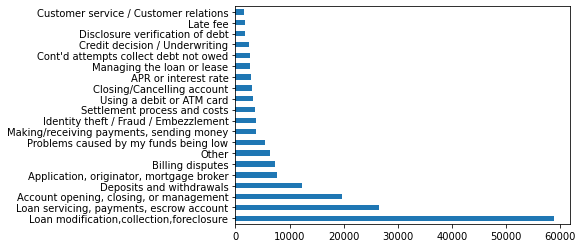

In [10]:
df['Issue'].value_counts()[:20].plot(kind='barh')

<AxesSubplot:>

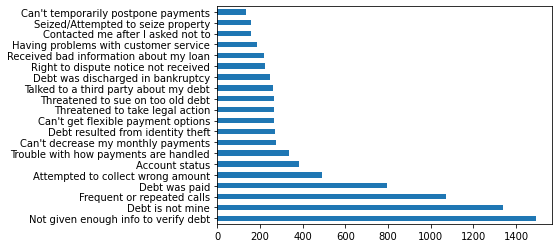

In [11]:
df['Sub-issue'].value_counts()[:20].plot(kind='barh')

In [12]:
df['Consumer complaint narrative'].value_counts().head()

I have had my bank of america credit card ending in XXXX for year and have never been late. Bank of america sent me a letter on XXXX/XXXX/2015 that they are closing my personal account due to an issue with my business account. This has hurt me tremendously as my credit score has suffered due to this matter.                                                                                                                                                                                                                                                   3
Unauthorized inquiry and/or unknown company                                                                                                                                                                                                                                                                                                                                                                                                                    

In [13]:
df['Company public response'].value_counts()

Company has responded to the consumer and the CFPB and chooses not to provide a public response                            35858
Company chooses not to provide a public response                                                                           22535
Company believes it acted appropriately as authorized by contract or law                                                      58
Company believes complaint caused principally by actions of third party outside the control or direction of the company        3
Company believes complaint represents an opportunity for improvement to better serve consumers                                 1
Company believes complaint is the result of an isolated error                                                                  1
Company believes complaint relates to a discontinued policy or procedure                                                       1
Company believes the complaint is the result of a misunderstanding                               

In [14]:
df['Company public response'].value_counts(normalize=True)

Company has responded to the consumer and the CFPB and chooses not to provide a public response                            0.613398
Company chooses not to provide a public response                                                                           0.385490
Company believes it acted appropriately as authorized by contract or law                                                   0.000992
Company believes complaint caused principally by actions of third party outside the control or direction of the company    0.000051
Company believes complaint represents an opportunity for improvement to better serve consumers                             0.000017
Company believes complaint is the result of an isolated error                                                              0.000017
Company believes complaint relates to a discontinued policy or procedure                                                   0.000017
Company believes the complaint is the result of a misunderstanding          

<AxesSubplot:ylabel='Company public response'>

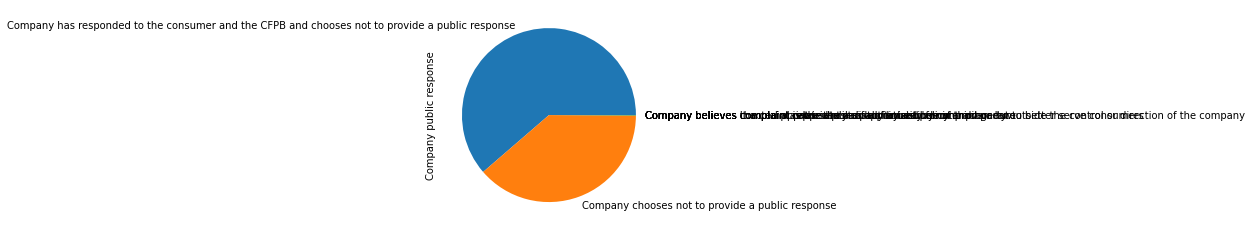

In [15]:
df['Company public response'].value_counts().plot(kind = 'pie')

In [16]:
df['Consumer consent provided?'].value_counts()

Consent provided        29393
Consent not provided    19727
Other                    2192
Consent withdrawn           1
Name: Consumer consent provided?, dtype: int64

<AxesSubplot:ylabel='Submitted via'>

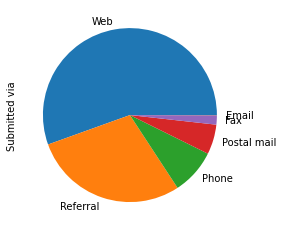

In [17]:
df['Submitted via'].value_counts().plot(kind = 'pie')

In [18]:
df['Submitted via'].value_counts(normalize=True)

Web            0.554907
Referral       0.287359
Phone          0.084580
Postal mail    0.055515
Fax            0.017075
Email          0.000565
Name: Submitted via, dtype: float64

In [19]:
df['Company response to consumer'].value_counts()

Closed with explanation            148930
Closed with monetary relief         22918
Closed with non-monetary relief     19005
Closed without relief               11119
Closed with relief                   2839
Closed                               2274
Untimely response                     175
Name: Company response to consumer, dtype: int64

<AxesSubplot:>

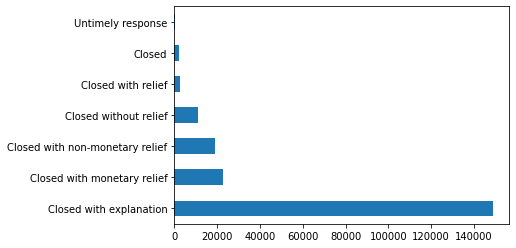

In [20]:
df['Company response to consumer'].value_counts().plot(kind='barh')

In [21]:
df['Company response to consumer'].value_counts(normalize=True)

Closed with explanation            0.718566
Closed with monetary relief        0.110576
Closed with non-monetary relief    0.091696
Closed without relief              0.053648
Closed with relief                 0.013698
Closed                             0.010972
Untimely response                  0.000844
Name: Company response to consumer, dtype: float64

In [22]:
df['Timely response?'].value_counts()

Yes    202603
No       4657
Name: Timely response?, dtype: int64

In [23]:
df.isna().sum(axis=0)

Date received                        0
Product                              0
Sub-product                      43015
Issue                                0
Sub-issue                       196913
Consumer complaint narrative    177869
Company public response         148802
Company                              0
State                             2194
ZIP code                          9286
Tags                            178995
Consumer consent provided?      155947
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                   0
Complaint ID                         0
dtype: int64

In [24]:
df['Consumer disputed?'].value_counts()

No     162357
Yes     44903
Name: Consumer disputed?, dtype: int64

In [25]:
df['Consumer disputed?'].fillna('No', inplace=True)
df['Consumer disputed?'] = df['Consumer disputed?'].astype('category')

<AxesSubplot:ylabel='Consumer disputed?'>

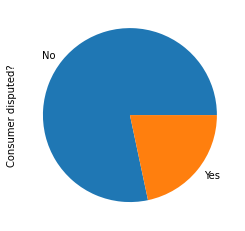

In [26]:
df['Consumer disputed?'].value_counts().plot(kind='pie')

In [27]:
df['Consumer disputed?'].value_counts() / (df['Consumer disputed?'].value_counts().sum())

No     0.783349
Yes    0.216651
Name: Consumer disputed?, dtype: float64

In [28]:
X = df[[ 'Product', 'Sub-product', 'Issue', 'Sub-issue',
        'Company public response', 'Company',
       'State',  'Tags', 'Consumer consent provided?',
       'Submitted via',  'Company response to consumer',
       'Timely response?']]

In [29]:
#missing values check 

print(len(X)) # Number of rows before dropna()
print(len(X.dropna())) # Number of rows after dropna() 

207260
435


In [30]:
# Next, we convert all the X observations into numbers
X = pd.get_dummies(X)

In [31]:
y = df['Consumer disputed?']

In [32]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(df['Consumer disputed?'])
print(le.classes_)
print(le.inverse_transform(list(set(y))))
labels = dict(zip(list(set(y)), le.inverse_transform(list(set(y)))))
print("\nLabel mapping is:", labels)


['No' 'Yes']
['No' 'Yes']

Label mapping is: {0: 'No', 1: 'Yes'}


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(165808, 305)
(165808,)
(41452, 305)
(41452,)


In [35]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler()
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [36]:
y_train.sum()/len(y_train) #just checking that the '1' category is exactly 50% of the training set

0.5

In [37]:
X_train.shape

(71762, 305)

In [38]:
pd.DataFrame(y_train).value_counts()

0    35881
1    35881
dtype: int64

In [39]:
# Fit the model
from xgboost import XGBClassifier

model_xgb = XGBClassifier(use_label_encoder=False, objective= 'binary:logistic')
model_xgb.fit(X_train, y_train)

[15:28:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [40]:
# Perform predictions, and store the results in a variable called 'pred'
pred = model_xgb.predict(X_test)

In [41]:
pd.DataFrame(pred).value_counts()

1    21032
0    20420
dtype: int64

              precision    recall  f1-score   support

           0       0.84      0.53      0.65     32430
           1       0.27      0.63      0.38      9022

    accuracy                           0.55     41452
   macro avg       0.55      0.58      0.51     41452
weighted avg       0.71      0.55      0.59     41452



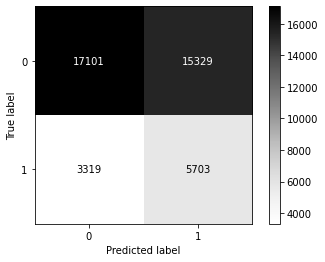

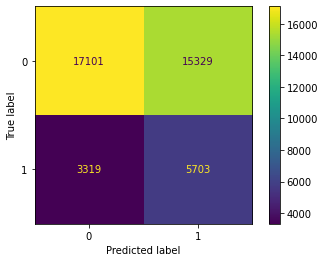

In [42]:
# Check the classification report and the confusion matrix
print(classification_report(y_true = y_test, y_pred = pred))
plot_confusion_matrix(model_xgb, X = X_test, y_true = y_test, cmap='Greys');

cm = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [59]:
# Set threshold for identifying class 1
threshold = 0.34


In [60]:
pred_prob = model_xgb.predict_proba(X_test)
pred_prob = pred_prob[:,1]
pred = (pred_prob>threshold).astype(int)
cm = confusion_matrix(y_test, pred)
print ("Confusion Matrix : \n", cm)
print('Test accuracy = ', accuracy_score(y_test, pred))

Confusion Matrix : 
 [[ 5148 27282]
 [  539  8483]]
Test accuracy =  0.3288381742738589


In [61]:
print(classification_report(y_true = y_test, y_pred = pred))

              precision    recall  f1-score   support

           0       0.91      0.16      0.27     32430
           1       0.24      0.94      0.38      9022

    accuracy                           0.33     41452
   macro avg       0.57      0.55      0.32     41452
weighted avg       0.76      0.33      0.29     41452



In [62]:
# See what predicted probabilities look like
pred_prob= model_xgb.predict_proba(X_test)

In [63]:
pred_prob = pred_prob[:,1]

In [64]:
# AUC calculation
from sklearn import metrics
metrics.roc_auc_score(y_test, pred_prob)

0.6133402209407189

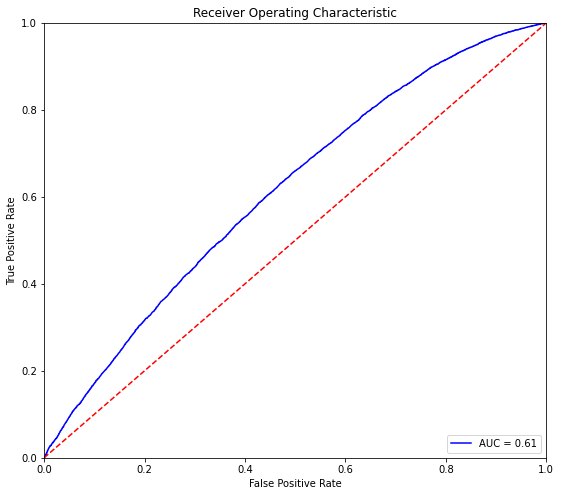

In [65]:
# Source for code below: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (9,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [66]:
pd.DataFrame({'TPR': tpr, 'FPR': fpr, 'Threshold': thresholds}).sort_values(by = ['Threshold']).reset_index(drop=True)

,TPR,FPR,Threshold
0,1.000000,1.000000,0.005709
1,1.000000,0.999846,0.008602
2,1.000000,0.999784,0.008796
3,1.000000,0.998612,0.094327
4,0.999889,0.998612,0.094782
...,...,...,...
14184,0.000333,0.000278,0.880908
14185,0.000222,0.000247,0.887187
14186,0.000222,0.000031,0.917500
14187,0.000000,0.000031,0.937977


In [67]:
model = sm.Logit(y_train, X_train).fit(method='bfgs')
model.summary()

         Current function value: 0.673631
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/opt/conda/envs/mggy8413/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/conda/envs/mggy8413/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                71762
Model:                          Logit   Df Residuals:                    71500
Method:                           MLE   Df Model:                          261
Date:                Fri, 03 Dec 2021   Pseudo R-squ.:                 0.02816
Time:                        15:40:12   Log-Likelihood:                -48341.
converged:                      False   LL-Null:                       -49742.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================================================================================================================================================
                                                                                                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Product_Bank account or service                                                                                                                    -0.0572        nan        nan        nan         nan         nan
Product_Consumer Loan                                                                                                                               0.0464        nan        nan        nan         nan         nan
Product_Credit card                                                                                                                                 0.0752        nan        nan        nan         nan         nan
Product_Credit reporting                                                                                                                           -0.0728        nan        nan        nan         nan         nan
Product_Debt collection                                                                                                                            -0.1429        nan        nan        nan         nan         nan
Product_Money transfers                                                                                                                            -0.0094        nan        nan        nan         nan         nan
Product_Mortgage                                                                                                                                   -0.0786        nan        nan        nan         nan         nan
Product_Other financial service                                                                                                                     0.0055        nan        nan        nan         nan         nan
Product_Payday loan                                                                                                                                -0.0113        nan        nan        nan         nan         nan
Product_Prepaid card                                                                                                                               -0.0996        nan        nan        nan         nan         nan
Product_Student loan                                                                                                                               -0.0496        nan        nan        nan         nan         nan
Sub-product_(CD) Certificate of deposit                                                                                                             0.1232        nan        nan        nan         nan         nan
Sub-product_Auto                                             

In [68]:

# Set threshold for identifying class 1
threshold = 0.20

In [69]:
# Create predictions.  Note that predictions give us probabilities, not classes!
pred_prob = model.predict(X_test)

# Convert probabilities to 1s and 0s based on threshold
pred = (pred_prob>threshold).astype(int)
 
# confusion matrix
cm = confusion_matrix(y_test, pred)
print ("Confusion Matrix : \n", cm)
 
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, pred))

Confusion Matrix : 
 [[  107 32323]
 [    9  9013]]
Test accuracy =  0.22001350960146676


In [70]:
cm = confusion_matrix(y_test, pred)
pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,107,32323
Actual 1,9,9013


In [71]:
print(classification_report(y_true = y_test, y_pred = pred))

              precision    recall  f1-score   support

           0       0.92      0.00      0.01     32430
           1       0.22      1.00      0.36      9022

    accuracy                           0.22     41452
   macro avg       0.57      0.50      0.18     41452
weighted avg       0.77      0.22      0.08     41452



In [72]:
# See what predicted probabilities look like
pred_prob

33787     0.506146
49710     0.521038
190261    0.356554
116948    0.533562
192281    0.612070
            ...   
6065      0.552323
112206    0.415872
184595    0.714033
128707    0.568751
57042     0.484584
Length: 41452, dtype: float64

<AxesSubplot:>

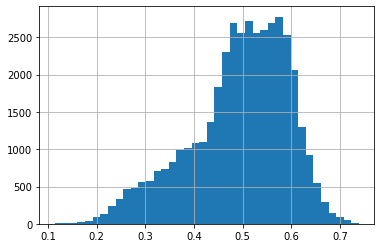

In [73]:
# A histogram of probabilities.  Why not?
pred_prob.hist(bins=40)

In [74]:
# AUC calculation
metrics.roc_auc_score(y_test, pred_prob)

0.6068556797434824

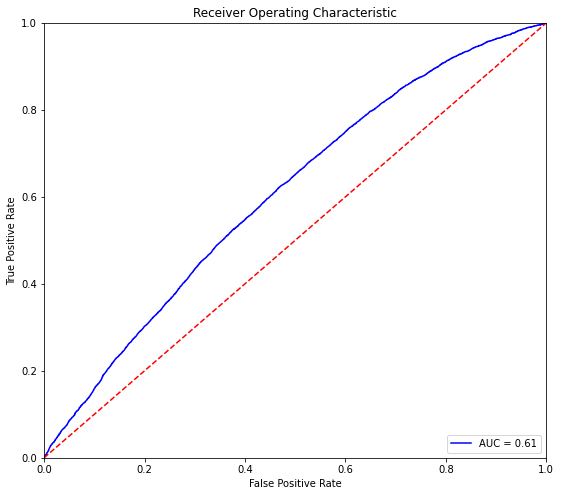

In [75]:
# Source for code below: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (9,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()